<a href="https://colab.research.google.com/github/meriemdouider1/Elimination-recursive-des-fonctionnalit-s/blob/main/cx_pipiensstratified11janvier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [ ]:
Cl = '/content/cx_pipiensdés.xlsx' 
data= pd.read_excel(Cl, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [ ]:
del data["Source"] 
del data["CodeSite"] 
data

,X_long,Y_lat,Cx_pipiens,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,1,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,1,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,-5.833954,35.759465,1,0.000000,0.000000,0.000000,0.000000,1.795786,0,0,0,0,0,0,0,10,0,0,90,2340,810,30,40,88,0,0,88,1560,3120,627,131,76,0,14949,528,46,14,95,1,0,...,26.100000,22.700001,19.400000,16.600000,8.3,9.5,11.3,12.7,14.900000,18.299999,20.799999,21.299999,19.900000,16.500000,13.300000,10.4,1.11,1.15,1.21,1.29,1.48,1.74,1.97,2.07,1.93,1.64,1.37,1.21,3.6,4.4,4.2,3.9,3.7,3.7,3.6,3.3,3.4,3.5,3.8,3.9
356,-5.366667,35.766667,1,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
357,-5.360864,3

In [ ]:
X = data.loc[:, data.columns != 'Cx_pipiens']
Y = data.Cx_pipiens

In [ ]:
X

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,85,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,-5.833954,35.759465,0.000000,0.000000,0.000000,0.000000,1.795786,0,0,0,0,0,0,0,10,0,0,90,2340,810,30,40,88,0,0,88,1560,3120,627,131,76,0,14949,528,46,14,95,1,0,96,...,26.100000,22.700001,19.400000,16.600000,8.3,9.5,11.3,12.7,14.900000,18.299999,20.799999,21.299999,19.900000,16.500000,13.300000,10.4,1.11,1.15,1.21,1.29,1.48,1.74,1.97,2.07,1.93,1.64,1.37,1.21,3.6,4.4,4.2,3.9,3.7,3.7,3.6,3.3,3.4,3.5,3.8,3.9
356,-5.366667,35.766667,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,94,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
357,-

In [ ]:
Y

0      0
1      0
2      0
3      1
4      1
      ..
355    1
356    1
357    1
358    1
359    1
Name: Cx_pipiens, Length: 360, dtype: int64

In [ ]:
feature_selected1=['Bovins', 'Ovins', 'VegCul', 'VarT_Cy_IRM', 'Amp2_TempJ', 'Amp3_TempJ',
       'Var_TempJ', 'Amp2_TempN', 'VarT_ann_NDVI', 'Var_NDVI', 'Moy_EVI',
       'CEC', 'Sol_Limon', 'Elev_Max', 'Elev_Moyenne', 'IPT_Med', 'IPT_Moy',
       'Isoth', 'Bio_Tmin', 'Bio_Tint', 'Bio_Thum_Moy', 'Bio_Tch_Moy',
       'Prec_Fev', 'Prec_Avril', 'Rad_Fev', 'Rad_Aout', 'Tmax_Janv',
       'Tmax_Fev', 'Vent_Janv', 'Vent_Mars', 'Vent_Sept', 'Vent_Nov']

In [ ]:
 x_rfe1=X[feature_selected1]

In [ ]:
 x_rfe1

,Bovins,Ovins,VegCul,VarT_Cy_IRM,Amp2_TempJ,Amp3_TempJ,Var_TempJ,Amp2_TempN,VarT_ann_NDVI,Var_NDVI,Moy_EVI,CEC,Sol_Limon,Elev_Max,Elev_Moyenne,IPT_Med,IPT_Moy,Isoth,Bio_Tmin,Bio_Tint,Bio_Thum_Moy,Bio_Tch_Moy,Prec_Fev,Prec_Avril,Rad_Fev,Rad_Aout,Tmax_Janv,Tmax_Fev,Vent_Janv,Vent_Mars,Vent_Sept,Vent_Nov
0,0.000000,0.000000,0,49,83,7,6,44,2,7,2906,11.166667,19.083333,11,6.0,-0.1875,0.375000,59.375002,14.5,12.000000,22.050000,22.600000,2,1,17773,23115,21.5,21.799999,4.8,6.1,6.3,5.5
1,0.000214,0.034352,0,73,126,31,26,55,13,1,2596,12.750000,17.500000,77,69.0,-0.5000,-0.281250,55.461394,12.0,17.700001,20.200000,24.266667,3,1,16620,22648,21.9,22.600000,4.2,4.8,5.7,3.7
2,0.000214,0.034352,0,73,126,31,26,55,13,1,2596,12.750000,17.500000,77,69.0,-0.5000,-0.281250,55.461394,12.0,17.700001,20.200000,24.266667,3,1,16620,22648,21.9,22.600000,4.2,4.8,5.7,3.7
3,0.000000,0.000000,0,48,120,23,25,61,8,1,2578,12.000000,18.083333,79,50.0,1.5625,0.898438,54.932949,12.3,17.400001,20.350000,24.383334,3,1,16659,22569,21.9,22.600000,4.2,5.1,5.7,3.7
4,0.000000,0.000000,0,18,115,33,26,58,1,20,2190,12.750000,13.916667,57,16.5,-3.7500,-3.468750,54.952379,12.4,17.500000,20.500000,24.500000,2,1,16615,22619,22.0,22.799999,4.2,5.0,5.6,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.000000,0.000000,0,88,46,14,59,35,61,53,3075,21.083333,29.416667,73,52.5,-0.1875,-0.078125,34.904017,8.3,19.099999,13.916667,23.750000,95,65,11911,24585,15.5,16.600000,3.6,4.2,3.4,3.8
356,8.495770,15.116930,39,80,78,5,64,40,52,100,5253,27.000000,26.916667,187,112.0,1.3125,2.828125,32.194897,9.4,18.300001,12.766667,23.866667,98,58,11971,23626,15.2,15.400000,4.1,4.6,4.0,4.0
357,7.097884,13.743934,32,80,79,4,57,34,60,70,4367,25.666667,30.833333,33,1.0,-0.8750,-1.687500,32.867785,9.9,17.900000,14.266667,23.999999,83,59,11998,23618,15.7,15.800000,3.8,4.4,4.0,3.9
358,7.411978,15.054404,60,88,66,6,45,27,84,155,5078,19.666667,28.833333,148,98.0,2.2500,2.179688,32.188646,9.4,18.200001,12.800000,23.866666,98,58,11905,23504,15.3,15.500000,4.0,4.5,3.9,3.9


XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

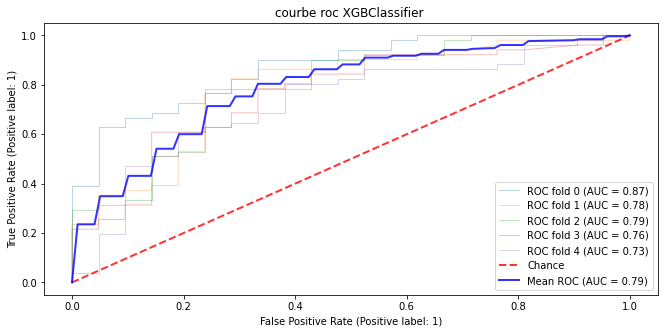

Accuracy: [0.81944444 0.77777778 0.77777778 0.76388889 0.72222222]
moy_accuracy: 0.77
precision_positive: [0.86538462 0.83018868 0.83018868 0.82692308 0.79245283]
moy_precision_positive: 0.83
sensibilité : [0.88235294 0.8627451  0.8627451  0.84313725 0.82352941]
moy_sensibilité: 0.85
spécificité : [0.66666667 0.57142857 0.57142857 0.57142857 0.47619048]
moy_spécificité: 0.57
MCC : [0.55714203 0.44775813 0.44775813 0.42069908 0.30909755]
MCC: 0.44
balanced_accuracy : [0.7745098  0.71708683 0.71708683 0.70728291 0.64985994]
balanced_accuracy: 0.71
roc_auc : [0.86928105 0.78478058 0.79365079 0.76190476 0.72922502]
roc_auc: 0.79
cohen_kappa_scorec : [0.55681818 0.44668588 0.44668588 0.42045455 0.30835735]
cohen_kappa_scorec: 0.44
VN : [14 12 12 12 10]
VP : [45 44 44 43 42]
FP : [ 7  9  9  9 11]
FN : [6 7 7 8 9]
precision_négative: [0.7        0.63157895 0.63157895 0.6        0.52631579]
moy_precision_négative: 0.62


In [ ]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=0.4,learning_rate=0.1,max_depth=5,n_estimators=100)}
def tp(y_true, y_pred): 
    value= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return value

my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
my_scorer1 = make_scorer(tp1, greater_is_better=True)

def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)
def VN(y_true, y_pred):
    value = confusion_matrix(y_true, y_pred)[0,0]
    return value
my_scorer3 = make_scorer(VN, greater_is_better=True)
def VP(y_true, y_pred):
    value = confusion_matrix(y_true, y_pred)[1,1]
    return value
my_scorer4 = make_scorer(VP, greater_is_better=True)
def FP(y_true, y_pred):
    value = confusion_matrix(y_true, y_pred)[0,1]
    return value
my_scorer5 = make_scorer(FP, greater_is_better=True)
def FN(y_true, y_pred):
    value = confusion_matrix(y_true, y_pred)[1,0]
    return value
my_scorer6 = make_scorer(FN, greater_is_better=True)
def precision_négative(y_true, y_pred):
    value = confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[1,0])
    return value
my_scorer7 = make_scorer(precision_négative, greater_is_better=True)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=45)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe1, Y)):
         clf.fit( x_rfe1.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe1.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe1, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe1, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe1, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe1, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe1, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    scores8 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer3, cv=cv, n_jobs=-1)
    scores9 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer4, cv=cv, n_jobs=-1)
    scores10 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer5, cv=cv, n_jobs=-1)
    scores11= cross_val_score(clf, x_rfe1, Y, scoring=my_scorer6, cv=cv, n_jobs=-1)
    scores12= cross_val_score(clf, x_rfe1, Y, scoring=my_scorer7, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision_positive:',scores1)
    print('moy_precision_positive: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))
    print('VN :',scores8)
    print('VP :',scores9)
    print('FP :',scores10)
    print('FN :',scores11)
    print('precision_négative:',scores12)
    print('moy_precision_négative: %.2f' % mean(scores12))
